In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
#!pip install yfinance
#!pip install pathlib
#!pip install ruamel-yaml

import yfinance as yf

# For time stamps
from datetime import datetime

<h2> Importing the Stocks data received </h2>

In [13]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')
stocks_df=pd.read_csv('C:/Users/adity/Downloads/sample_data (1).csv',index_col='date')
stocks_df.head()

,Unnamed: 0,open,high,low,close,volume
date,,,,,,
2022-01-03 09:15:00,0,252.70,254.25,252.35,252.60,319790
2022-01-03 09:30:00,1,252.60,253.65,251.75,252.80,220927
2022-01-03 09:45:00,2,252.95,254.90,252.30,252.85,526445
2022-01-03 10:00:00,3,252.85,253.15,252.40,252.55,280414
2022-01-03 10:15:00,4,252.55,253.10,252.25,252.80,112875


<h4>Summary of Sample Data</h4>

In [14]:
stocks_df.describe()

,Unnamed: 0,open,high,low,close,volume
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,999.500000,304.072050,305.112750,303.062375,304.087500,3.995450e+05
std,577.494589,23.117987,23.129187,23.076869,23.100806,4.938786e+05
min,0.000000,249.850000,250.150000,249.000000,249.800000,2.229300e+04
25%,499.750000,293.187500,294.125000,292.112500,293.250000,1.471022e+05
50%,999.500000,306.525000,307.975000,305.550000,306.675000,2.484240e+05
75%,1499.250000,321.700000,322.500000,320.700000,321.650000,4.841755e+05
max,1999.000000,341.100000,344.600000,340.300000,341.050000,8.346762e+06


In [15]:
#General Info 
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 2022-01-03 09:15:00 to 2022-04-29 15:15:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   open        2000 non-null   float64
 2   high        2000 non-null   float64
 3   low         2000 non-null   float64
 4   close       2000 non-null   float64
 5   volume      2000 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 109.4+ KB


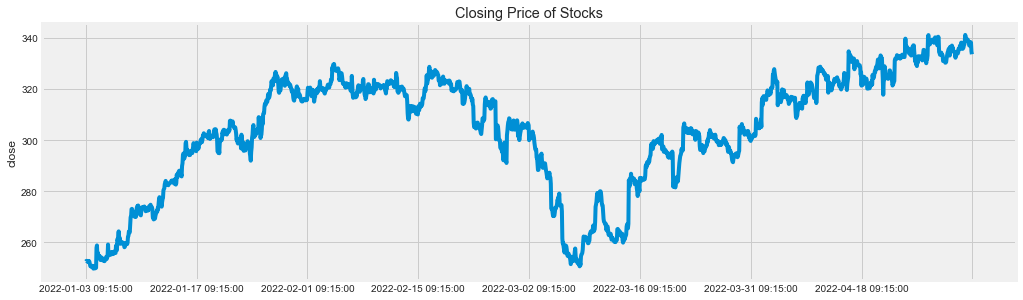

In [24]:
# Let's see a historical view of the closing price


plt.figure(figsize=(28, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

plt.subplot(2, 2, 2)
stocks_df['close'].plot()
plt.ylabel('close')
plt.xlabel(None)
plt.title(f"Closing Price of Stocks")
    
plt.tight_layout()

<body>Highest Close value can be seen after 2022-04-18 i.e., somwhere around May of 2022 with a total close value of around 342 to 345</body>

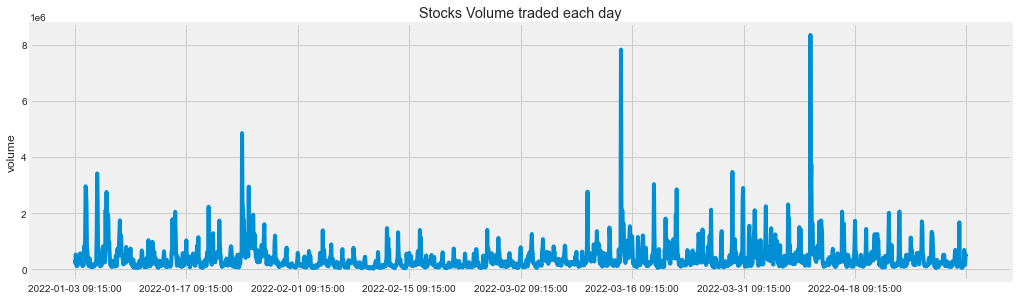

In [25]:
# Let's see a historical view of the volume traded each day


plt.figure(figsize=(28, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

plt.subplot(2, 2, 2)
stocks_df['volume'].plot()
plt.ylabel('volume')
plt.xlabel(None)
plt.title(f"Stocks Volume traded each day")
    
plt.tight_layout()

<body>here, the highest volume can be seen around 16th March of 2022 with volume of 8 , wherease in April 18th ,2022 , the max volume has reached more than 8 i.e., around 9</body>

In [26]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    stocks_df[column_name] = stocks_df['close'].rolling(ma).mean()

<Figure size 1440x720 with 0 Axes>

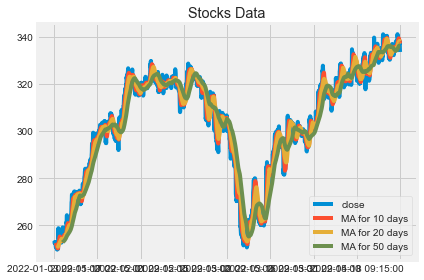

In [62]:

#plt.subplots_adjust(top=1.25, bottom=1.2)

fig = plt.figure(figsize=(20, 10))
stocks_df[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('Stocks Data')


plt.tight_layout()

<h3>For finding Daily Return</h3>

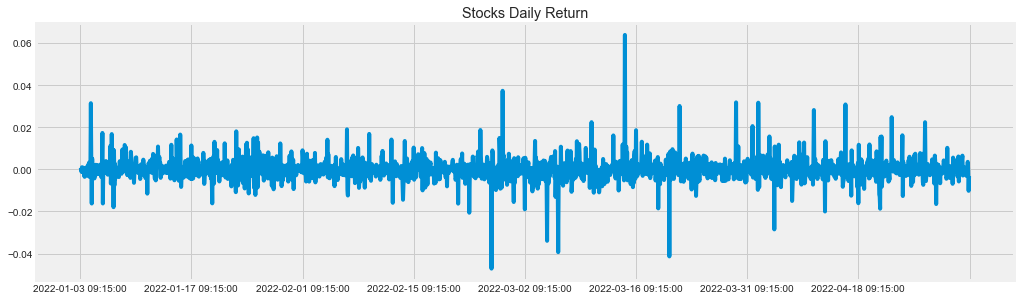

In [63]:
# Let's see a historical view of the Daily Return

stocks_df['Daily Return']=stocks_df['close'].pct_change()

plt.figure(figsize=(28, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

plt.subplot(2, 2, 2)
stocks_df['Daily Return'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title(f"Stocks Daily Return")
    
plt.tight_layout()

<h3>Average Daily Return using Histogram on the stocks Given</h3>

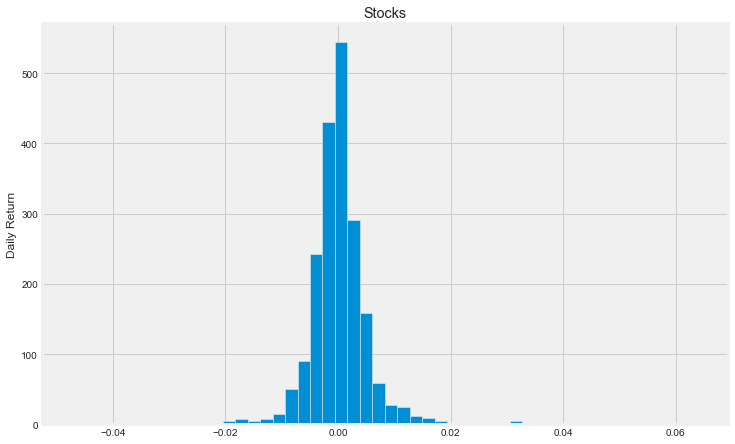

In [66]:
plt.figure(figsize=(20, 12))


plt.subplot(2, 2, 2)
stocks_df['Daily Return'].hist(bins=50)
plt.ylabel('Daily Return')
plt.title(f'Stocks')
    
plt.tight_layout()

<h3>Predicting the Closing Price of Stocks</h3>

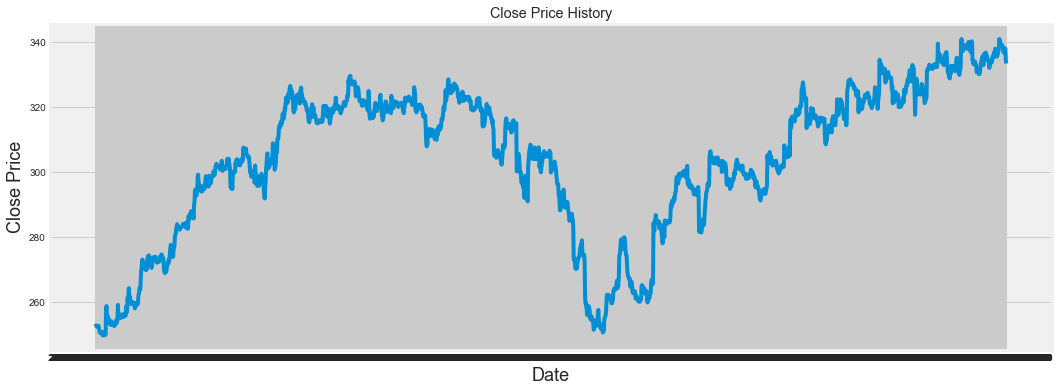

In [76]:
# Let's see a historical view of the closing price
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(stocks_df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [70]:
# Create a new dataframe with only the 'Close column 
data = stocks_df.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1900

In [71]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03068493],
       [0.03287671],
       [0.03342466],
       ...,
       [0.96712329],
       [0.92931507],
       [0.91726027]])

In [72]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.03068493, 0.03287671, 0.03342466, 0.03013699, 0.03287671,
       0.03013699, 0.03068493, 0.03287671, 0.0290411 , 0.02082192,
       0.0109589 , 0.01041096, 0.00767123, 0.00712329, 0.00986301,
       0.01205479, 0.00383562, 0.        , 0.0060274 , 0.00219178,
       0.0109589 , 0.00109589, 0.00273973, 0.00328767, 0.08931507,
       0.09917808, 0.05315068, 0.06739726, 0.05643836, 0.05205479,
       0.05589041, 0.05369863, 0.04164384, 0.03671233, 0.04109589,
       0.04712329, 0.04712329, 0.04054795, 0.03506849, 0.04054795,
       0.03506849, 0.03780822, 0.03178082, 0.03506849, 0.04      ,
       0.04438356, 0.0509589 , 0.04109589, 0.04712329, 0.05479452,
       0.1030137 , 0.0569863 , 0.0569863 , 0.06465753, 0.06520548,
       0.06520548, 0.06027397, 0.06027397, 0.07123288, 0.06794521])]
[0.06575342465753442]

[array([0.03068493, 0.03287671, 0.03342466, 0.03013699, 0.03287671,
       0.03013699, 0.03068493, 0.03287671, 0.0290411 , 0.02082192,
       0.0109589 , 0.01041096, 0.00

In [73]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1840/1840 [==============================] - 27s 14ms/step - loss: 0.0026


In [74]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.636030457792759

<ipython-input-77-c624982ab269>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


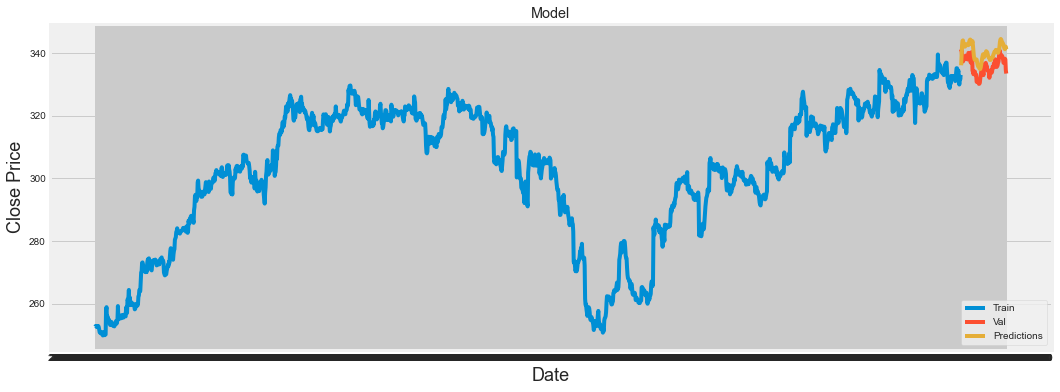

In [77]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<body>Above you can see the predicted value of the Close price of the Sample Stocks in the near future. I have used LSTM model with Hidden Dense layer of 24 layers and predicted the near future outcome of Close price of the stocks.
Thanks for the patience</body>